<a href="https://colab.research.google.com/github/MS-H2020/AOJ/blob/main/dnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [活動センサーログからの動作予測](https://signate.jp/competitions/116/submissions)

Thanks to "KASHISHBHAGAT" for my reference [Human Activity Recognition Using Neural Networks](https://www.kaggle.com/code/kashish8610/human-activity-recognition-using-neural-networks)

## Google Colabの設定

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#TEMP_DIR = "./temp"
INPUT_DIR:str = "/content/drive/MyDrive/Human_Activity_Recognition_with_Smartphones/01_input"
#TRAIN_DIR:str = INPUT_DIR + "/train_data"
#TEST_DIR:str = INPUT_DIR + "/test_data"
ANALYSIS_DIR:str = "/content/drive/MyDrive/Human_Activity_Recognition_with_Smartphones/03_code-analysis"
MODEL_DIR:str = "/content/drive/MyDrive/Human_Activity_Recognition_with_Smartphones//04_model"
SUBMISSION_DIR:str = '/content/drive/MyDrive/Human_Activity_Recognition_with_Smartphones/05_submission'
CHECKPOINT_PATH:str = MODEL_DIR

## メインコード

In [3]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv(INPUT_DIR+"/train.tsv", index_col='id', sep='\t')

In [5]:
df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",activity
id,,,,,,,,,,,,,,,,,,,,,
0,0.273049,0.029455,-0.108114,0.169687,-0.010238,-0.328502,0.124848,-0.107618,-0.276389,0.445229,...,-0.548450,-0.889451,0.163217,-0.924336,-0.979567,0.679692,-0.767623,0.241396,-0.056989,WALKING_DOWNSTAIRS
2,0.252055,-0.035983,-0.128469,-0.436843,-0.153635,-0.223741,-0.450711,-0.169382,-0.214256,-0.482311,...,-0.086837,-0.383948,0.161606,-0.047325,0.059193,-0.135756,-0.816405,0.172032,0.125650,WALKING
3,0.283767,-0.016931,-0.109087,-0.988980,-0.989567,-0.986512,-0.989212,-0.988799,-0.986351,-0.931380,...,-0.445331,-0.845203,-0.014492,0.756477,-0.762958,-0.958952,0.599734,-0.854922,-0.138131,LAYING
4,0.259078,-0.016357,-0.114833,-0.993216,-0.992404,-0.989001,-0.993880,-0.991913,-0.988457,-0.942268,...,0.624687,0.498270,0.087316,-0.434805,-0.478510,0.530472,0.677465,-0.581916,-0.416544,LAYING
5,0.273949,-0.021795,-0.117436,-0.995829,-0.984692,-0.986809,-0.996566,-0.984201,-0.986983,-0.933887,...,-0.393550,-0.757986,-0.007627,0.051640,0.665034,0.697867,-0.679295,0.319584,0.025221,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10288,0.264015,0.038842,-0.120877,-0.232794,-0.235580,-0.459693,-0.351933,-0.241603,-0.463831,-0.031382,...,-0.160632,-0.588660,0.211543,-0.781484,0.766219,0.468048,-0.771033,0.256378,0.017798,WALKING_UPSTAIRS
10289,0.279222,-0.005795,-0.092436,-0.996173,-0.969167,-0.980864,-0.996487,-0.969335,-0.978718,-0.939277,...,0.080477,-0.185231,0.010776,-0.255061,0.253623,0.376215,-0.796369,0.213405,-0.065949,STANDING
10292,0.272877,-0.033118,-0.086875,-0.416898,-0.080907,-0.369057,-0.466169,-0.104662,-0.358857,-0.081558,...,0.755409,0.663630,0.006660,-0.119243,-0.176671,-0.007256,-0.729335,0.257128,0.118934,WALKING


In [6]:
# Use a utility from sklearn to split and shuffle your dataset.
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['activity'])

In [7]:
X_train=train_df.iloc[:,:-1]
y_train=train_df.iloc[:,-1]

X_test=test_df.iloc[:,:-1]
y_test=test_df.iloc[:,-1]

In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y_train=encoder.fit_transform(y_train)
y_train=pd.get_dummies(y_train).values

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y_test=encoder.fit_transform(y_test)
y_test=pd.get_dummies(y_test).values

In [14]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [15]:
model=Sequential()
model.add(Dense(units=64,kernel_initializer='uniform',activation='relu',input_dim=X_train.shape[1]))

model.add(Dense(units=128,kernel_initializer='uniform',activation='relu'))

model.add(Dense(units=64,kernel_initializer='uniform',activation='relu'))

model.add(Dense(units=6,kernel_initializer='uniform',activation='softmax'))

In [16]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
history=model.fit(X_train,y_train,batch_size=256,epochs=22,validation_data=(X_test,y_test))

Epoch 1/22
17/17 [==============================] - 4s 100ms/step - loss: 1.7339 - accuracy: 0.4249 - val_loss: 1.5379 - val_accuracy: 0.4903
Epoch 2/22
17/17 [==============================] - 0s 24ms/step - loss: 1.2241 - accuracy: 0.5815 - val_loss: 0.9199 - val_accuracy: 0.6175
Epoch 3/22
17/17 [==============================] - 0s 29ms/step - loss: 0.7031 - accuracy: 0.7594 - val_loss: 0.4731 - val_accuracy: 0.7883
Epoch 4/22
17/17 [==============================] - 0s 19ms/step - loss: 0.3469 - accuracy: 0.8524 - val_loss: 0.2175 - val_accuracy: 0.9320
Epoch 5/22
17/17 [==============================] - 1s 35ms/step - loss: 0.1445 - accuracy: 0.9646 - val_loss: 0.0908 - val_accuracy: 0.9757
Epoch 6/22
17/17 [==============================] - 0s 22ms/step - loss: 0.0674 - accuracy: 0.9777 - val_loss: 0.0616 - val_accuracy: 0.9806
Epoch 7/22
17/17 [==============================] - 0s 25ms/step - loss: 0.0462 - accuracy: 0.9859 - val_loss: 0.0526 - val_accuracy: 0.9835
Epoch 8/22
1

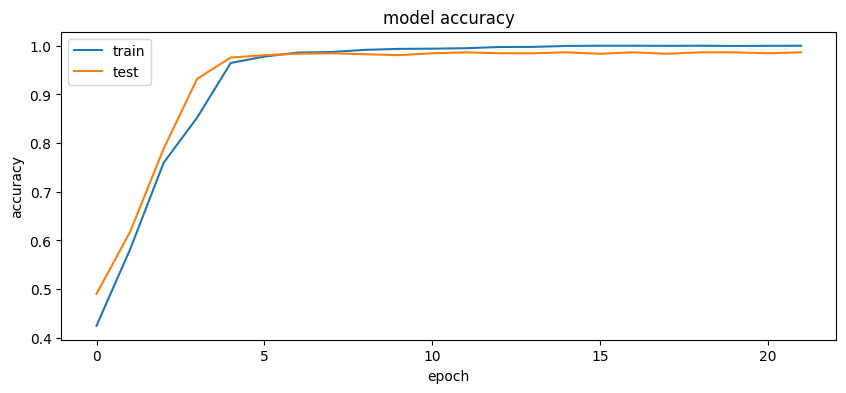

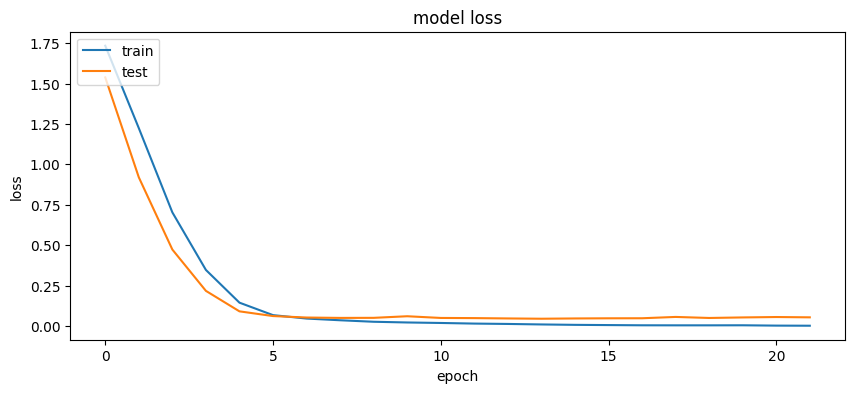

In [18]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 4
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
type(X_test)

numpy.ndarray

In [20]:
pd.DataFrame(X_test).head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,14.670492,3.949559,-1.393524,0.535376,-4.049941,4.302555,-4.718550,-0.156232,0.481025,-1.763725,...,-2.176882e-16,-4.442840e-17,-2.387715e-16,4.293762e-16,-1.882111e-16,4.995783e-16,-1.653413e-16,-3.812836e-16,-3.888478e-15,-1.688777e-16
1,-14.438677,-3.147133,3.834161,-3.311851,1.337436,1.268384,2.470552,0.598487,-1.158389,-0.968379,...,-8.550644e-17,1.254189e-16,7.301617e-17,3.037547e-16,1.067398e-16,-4.593837e-17,-3.144224e-16,-4.539681e-16,6.408221e-16,-8.711812e-16
2,-10.399242,-3.764662,-0.332816,1.873881,3.844895,1.874176,0.300950,-1.429184,1.446699,-0.776451,...,3.680700e-16,-3.604128e-16,3.426673e-16,2.491233e-17,3.582234e-16,-4.601604e-16,-3.209360e-16,-9.856505e-16,2.064887e-15,-4.357826e-16
3,-14.596311,1.919426,-0.657423,2.408224,1.992219,0.896385,0.090475,-0.298760,0.444634,-0.221404,...,1.909003e-16,2.656780e-16,-9.896611e-17,-7.466012e-17,1.761175e-16,-1.904473e-17,2.717079e-16,-3.521429e-16,1.763099e-15,-2.280242e-16
4,-14.736290,1.193285,-1.354861,4.082302,3.718114,1.003977,0.927911,-1.538132,0.438669,-1.023060,...,7.413018e-17,2.266990e-16,6.194271e-18,-1.641085e-16,3.890648e-16,-1.754961e-16,2.954780e-16,-3.770470e-16,2.938668e-15,2.811181e-16


In [21]:
y_pred=model.predict(X_test)

33/33 [==============================] - 0s 3ms/step


In [22]:
y_test_class=np.argmax(y_test,axis=1)
y_pred_class=np.argmax(y_pred,axis=1)

In [23]:
y_test_class

array([4, 0, 2, ..., 3, 1, 2])

In [24]:
y_pred_class

array([4, 0, 2, ..., 3, 1, 2])

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test_class,y_pred_class)
accuracy=accuracy_score(y_test_class,y_pred_class)

In [26]:
cm

array([[203,   0,   0,   0,   0,   0],
       [  0, 174,   5,   0,   0,   0],
       [  0,   5, 180,   0,   0,   0],
       [  0,   0,   0, 171,   0,   0],
       [  0,   0,   0,   0, 133,   3],
       [  0,   0,   0,   1,   0, 155]])

In [27]:
accuracy

0.9864077669902913

### submitファイルの作成

In [28]:
submit_df = pd.read_csv(INPUT_DIR+"/test.tsv", index_col=0, sep='\t')

In [29]:
scaler = StandardScaler()
submit_df_scaled = scaler.fit_transform(submit_df)
pd.DataFrame(submit_df_scaled).head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,-0.874625,-0.333227,0.883818,1.325547,1.453147,1.867636,1.337906,1.556096,1.686591,1.642692,...,-0.119036,0.854603,0.597031,1.332338,-0.972043,0.913501,-1.823668,-0.503695,0.498432,0.672969
1,0.064603,0.000577,-0.065833,-0.888530,-0.960076,-0.943453,-0.883547,-0.959895,-0.953316,-0.866465,...,1.842171,-1.722300,-1.102230,0.385025,-0.165068,0.167247,-0.744292,-0.371861,-0.361628,-0.382035
2,-0.045344,-0.033432,0.062777,-0.885219,-0.976391,-0.938056,-0.880247,-0.976892,-0.945776,-0.876110,...,1.878801,-0.961731,-0.769497,0.079145,0.246805,-0.424987,1.070697,2.035545,-2.081482,-1.503133
3,-1.376807,0.015636,0.067328,1.166911,0.832146,1.166560,1.099745,0.845422,1.237343,1.508028,...,-0.292170,0.290688,0.082421,2.195873,-0.392965,-0.986887,-0.177782,-0.035377,0.504046,1.419515
4,0.040864,0.155495,0.029448,-0.895779,-0.977223,-0.914862,-0.889261,-0.976177,-0.913867,-0.889332,...,1.812790,-1.587776,-1.127148,0.453699,0.147924,0.085530,-0.520712,-0.666842,0.447230,0.257977


In [30]:
type(submit_df_scaled)

numpy.ndarray

In [32]:
pred = model.predict(submit_df_scaled)
pred_label = np.argmax(pred,axis=1)
pred_class = list(encoder.inverse_transform(pred_label))

161/161 [==============================] - 1s 7ms/step


In [33]:
ans = pd.read_csv(INPUT_DIR+"/sample_submit.csv",  header=None)
ans[1] = pred_class
ans.to_csv(path_or_buf = SUBMISSION_DIR+"/submit.csv", index=False, header=None)

In [34]:
ans

,0,1
0,1,WALKING
1,6,SITTING
2,8,LAYING
3,9,WALKING_UPSTAIRS
4,12,SITTING
...,...,...
5145,10291,LAYING
5146,10293,STANDING
5147,10295,WALKING_DOWNSTAIRS
5148,10297,STANDING
